In [1]:
"""
 heatImage : smoothing using laplacian filter
           
 create   : 2019/10/16
 modified : 2019/10/19
"""

'\n corners : \n           \n create   : 2019/10/16\n modified : 2019/10/19\n'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
# RGB2GRAY
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [4]:
# convolution 2D
def conv2d(img, kernel, padding='same'):
    # Error handling
    if kernel.shape[0] != kernel.shape[1]:
        print("Use square filter!")
        return None
    
    if kernel.shape[0]%2 == 0 and kernel.shape[1]%2 == 0:
        print("filter size has to be odd")
        return None
    
    # Create result matrix
    result = np.zeros_like(img)
    
    # Calculate kernel size
    kernel_size = kernel.shape[0]
    
    # same padding
    if padding=='same':
        pad_size = int((kernel_size - 1) / 2)
    else:
        pad_size = 0
    img = np.pad(img, pad_size, mode='constant')
    
    # convolution
    width, height = img.shape
    offset = int(kernel_size / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            result[x-offset, y-offset] = np.sum(img[x-offset:x+offset+1, y-offset:y+offset+1] * kernel)
            
    return result

In [5]:
def filterImg(img, fil):
    """
        Paramters:
            1. img : input image
            2. fil : filter
            
        Return:
            1. the filtered image
    """
    return conv2d(img.copy(), fil, padding="same")

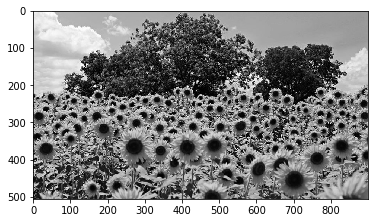

In [32]:
# read image
img = mpl.image.imread("sunflower.jpg")
img = rgb2gray(img)
plt.imshow(img, cmap='gray')

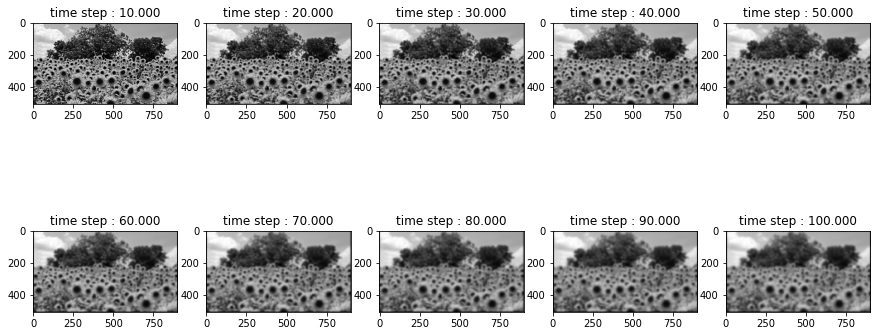

In [31]:
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
result = img.copy()

fig = plt.figure(figsize= (15,7))
dt = 0.2
plt_idx = 1
for step in range(1, 101):
    result = result + dt*filterImg(result, laplacian)
    
    if step % 10 == 0:
        ax = fig.add_subplot(2, 5, plt_idx)
        ax.imshow(result, cmap='gray')
        ax.set_title("time step : %.3f" % (step))
        plt_idx = plt_idx + 1